# CONET simulated data preparation
> generate data from CopyTree model and pre-process for use with CONET

## Read simulated data

In [1]:
import matplotlib.pyplot as plt
import scgenome.plotting as pl
import anndata
import pandas as pd

In [7]:
from utils.evaluation import sample_dataset_generation

jq, adata = sample_dataset_generation(K=6, M=1000, N=300, seed=50)
# adata = anndata.read_h5ad("/Users/zemp/PycharmProjects/victree/datasets/simul_k5a7n300m2012e10-1000d10mt1-10-2500-50.h5ad")

/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/pyranges/methods/init.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return {k: v for k, v in df.groupby(grpby_key)}


In [8]:
adata.layers

Layers with keys: copy, state

/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


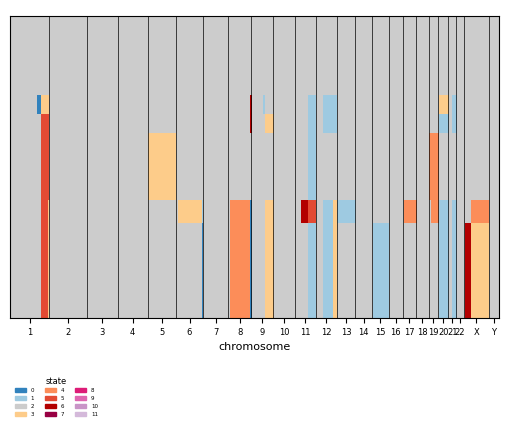

In [9]:
%matplotlib inline
pl.plot_cell_cn_matrix_fig(adata, 'state', cell_order_fields=['clone'], max_cn=7);

/Users/zemp/miniconda3/envs/victree310/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x2848ef6d0>


DEBUG: locator: <matplotlib.ticker.AutoLocator object at 0x2848ef6d0>


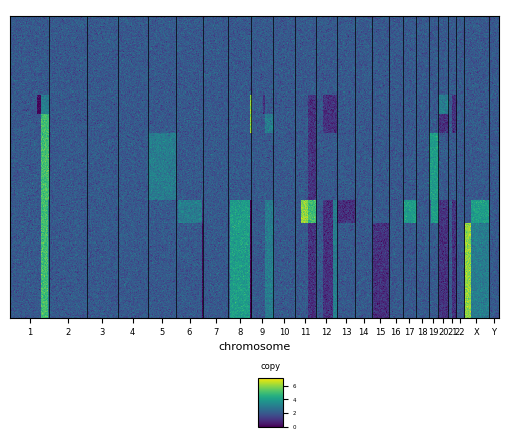

In [14]:
pl.plot_cell_cn_matrix_fig(adata, 'copy', cell_order_fields=['clone'], max_cn=7, raw=True);

## Candidate breakpoints

**ground truth candidate**

In [10]:
# create dataframe chr, start, end, c1, c2, ..., cN
adata.obs_names = pd.Series(['c' + str(i).zfill(3) for i in range(adata.n_obs)])

In [11]:
from utils.preprocessing import convert_adata_to_conet_input
from main import set_logger
set_logger(debug=True)
conet_df = convert_adata_to_conet_input(adata, cell_perc_thresh=.3)

DEBUG:root:copy number changes new breakpoint candidates: 37


DEBUG: copy number changes new breakpoint candidates: 37


DEBUG:root:mapping autosomes X->23, Y-> 24


DEBUG: mapping autosomes X->23, Y-> 24


DEBUG:root:beginning-end chr new candidates: 48


DEBUG: beginning-end chr new candidates: 48


DEBUG:root:high count diff new candidates: 3


DEBUG: high count diff new candidates: 3


DEBUG:root:shift to right new candidates: 64


DEBUG: shift to right new candidates: 64


In [12]:
# save file csv
conet_df.to_csv("/Users/zemp/phd/msk/conet-exp/corr_counts_synth.csv", index=False)

In [13]:
conet_df.head()

,chr,start,end,candidate_brkp,c000,c001,c002,c003,c004,c005,...,c291,c292,c293,c294,c295,c296,c297,c298,c299,width
0,1,0,3099735,1,2.055462,2.127837,2.470462,2.324071,1.546318,2.318840,...,1.786113,2.064934,2.026568,2.182278,2.282905,2.357281,2.227767,1.967422,2.050848,3099735
1,1,3099735,6199470,1,2.007138,2.450736,2.212029,2.368716,2.036945,1.381134,...,2.093346,1.883186,1.345917,2.481580,2.041714,1.918338,1.682809,2.114318,1.967344,3099735
2,1,6199470,9299205,0,2.214103,1.619356,2.387698,2.393475,1.699347,1.973730,...,1.709489,1.737692,1.912627,2.027590,2.149245,1.928390,2.102365,1.938542,1.544328,3099735
3,1,9299205,12398940,0,1.567918,1.761217,2.285073,1.867654,1.912887,1.767744,...,2.575505,1.925803,2.496444,1.696756,1.523649,1.873600,1.707081,2.001007,2.228868,3099735
4,1,12398940,15498675,0,1.564055,1.963121,1.630519,1.672125,1.614195,2.600855,...,2.500445,1.863000,1.968563,2.421714,2.321972,2.029253,1.357418,1.908185,2.321539,3099735


(array([ 438.,   11.,    8.,    9.,   12.,    7.,    9.,    5.,    9.,
          13.,    8.,    9.,    8.,   12.,    6.,   10.,   12.,    7.,
          17.,    7.,   13.,   13.,    7.,   12.,    7.,   11.,   19.,
          12.,   16.,   11.,   16.,   12.,   13.,   11.,   12.,   10.,
          11.,   12.,   13.,   12.,    9.,   24.,   14.,   17.,   19.,
          19.,   18.,   21.,   25.,   15.,   20.,   21.,   24.,   17.,
          29.,   19.,   24.,   33.,   31.,   24.,   32.,   32.,   37.,
          39.,   40.,   35.,   44.,   37.,   48.,   50.,   45.,   55.,
          39.,   39.,   50.,   59.,   48.,   55.,   63.,   68.,   51.,
          60.,   65.,   55.,   64.,   73.,   64.,   62.,   63.,   80.,
          66.,   77.,   69.,   92.,   80.,   93.,   79.,   80.,   88.,
         108.,   89.,   79.,  116.,  112.,  116.,  117.,  110.,  109.,
         110.,  119.,  114.,   87.,  129.,  129.,  130.,  121.,  128.,
         110.,  122.,  139.,  113.,  138.,  138.,  147.,  142.,  152.,
      

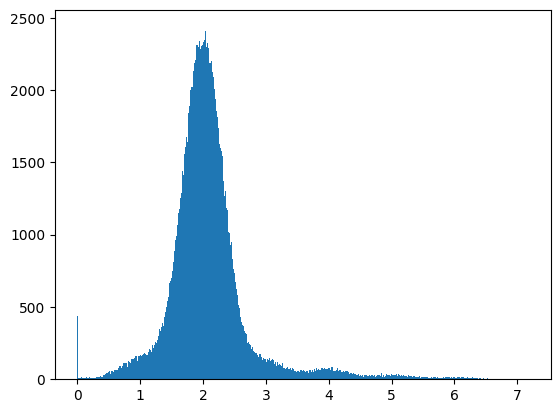

In [19]:
import matplotlib.pyplot as plt
plt.hist(adata.layers['copy'][...].flatten(), bins=1000)